In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import s3fs
import seaborn as sns

In [ ]:
# Load the dataset into dataframe

df = pd.read_csv('s3://fraud-detection-mlops-snira/creditcard.csv')
df.head()

c:\Users\EndUser\Downloads\Fraud-Detection-MLOps\venv\Lib\site-packages\fsspec\registry.py:283: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Show a summary of statistics

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
# Display the data shapes

print(f" Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

 Dataset contains 284807 rows and 31 columns


In [10]:
# Check the counts for Class column where 0: non fraudulent transaction and 1: fraudulent transaction

df['Class'].value_counts()  

Class
0    284315
1       492
Name: count, dtype: int64

# This shows that there are comparitevly less fraudulent tranactions than non fraudulent transactions

In [11]:
df['Amount'].value_counts()

Amount
1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
202.24        1
252.85        1
615.52        1
180.93        1
807.48        1
Name: count, Length: 32767, dtype: int64

In [13]:
# Check for missing values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

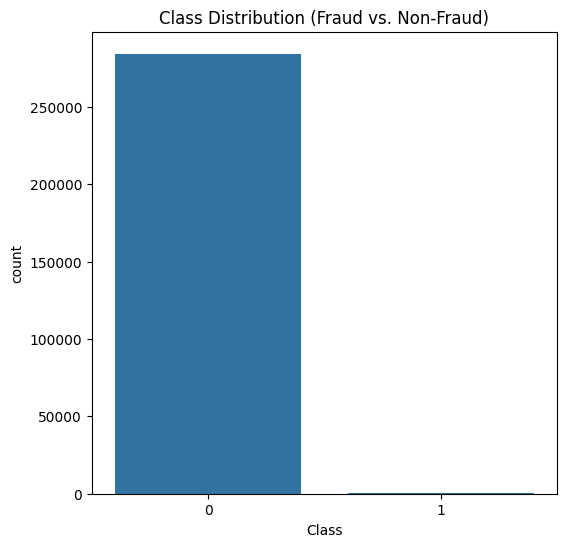

Class
0    284315
1       492
Name: count, dtype: int64
Fraud cases represent 0.1727% of the dataset.


In [16]:
# Check the distribution of fraudulent vs non fraudulent transactions

plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.show()

# Check exact class proportions
fraud_cases = df['Class'].value_counts()
print(fraud_cases)
print(f"Fraud cases represent {fraud_cases[1] / fraud_cases.sum() * 100:.4f}% of the dataset.")

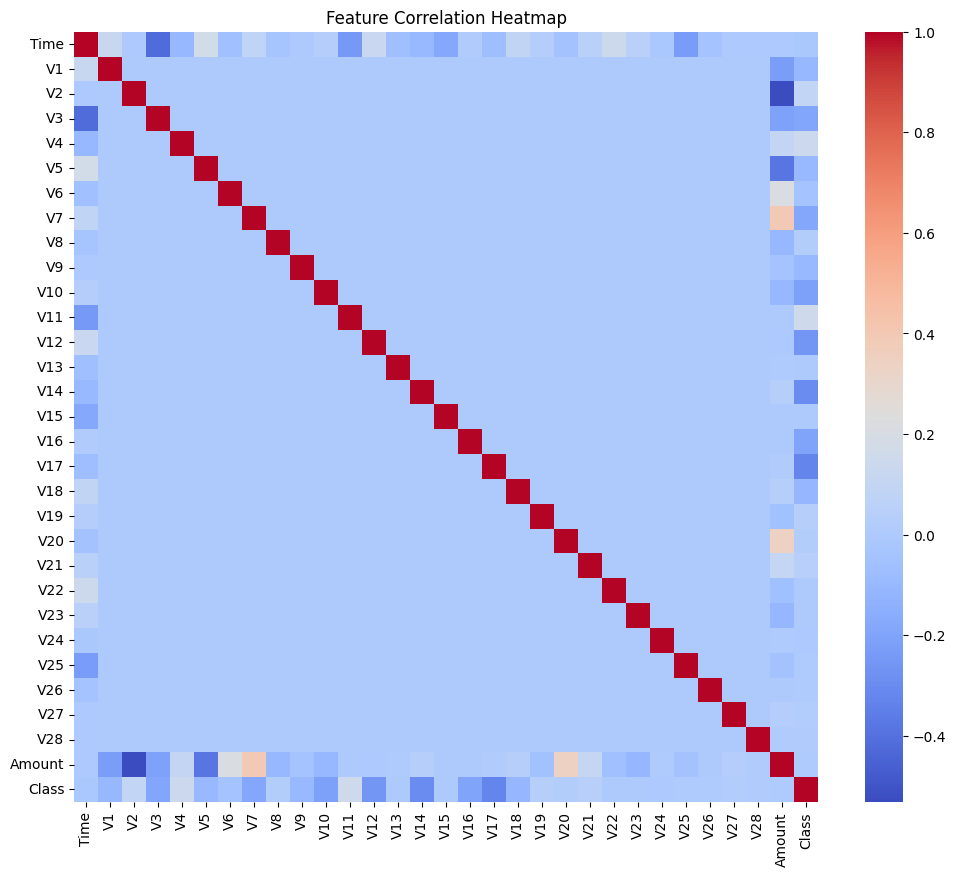

In [17]:
# Check for feature correlation

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

The above heatmap shows:
- There is a positive correlation between V7, V20 and Amount column
- There is a negative correlation between V2, V5 and Amount columns

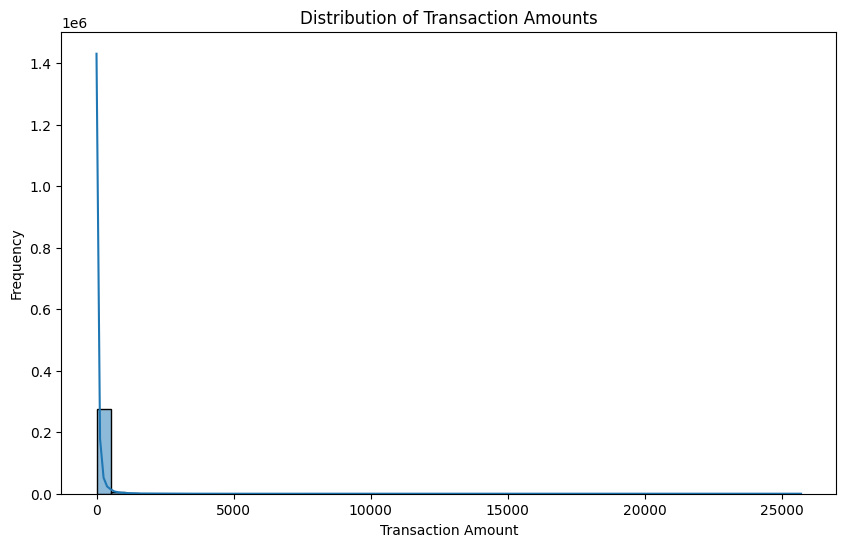

In [18]:
# Check the distribution of Amounts column

plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

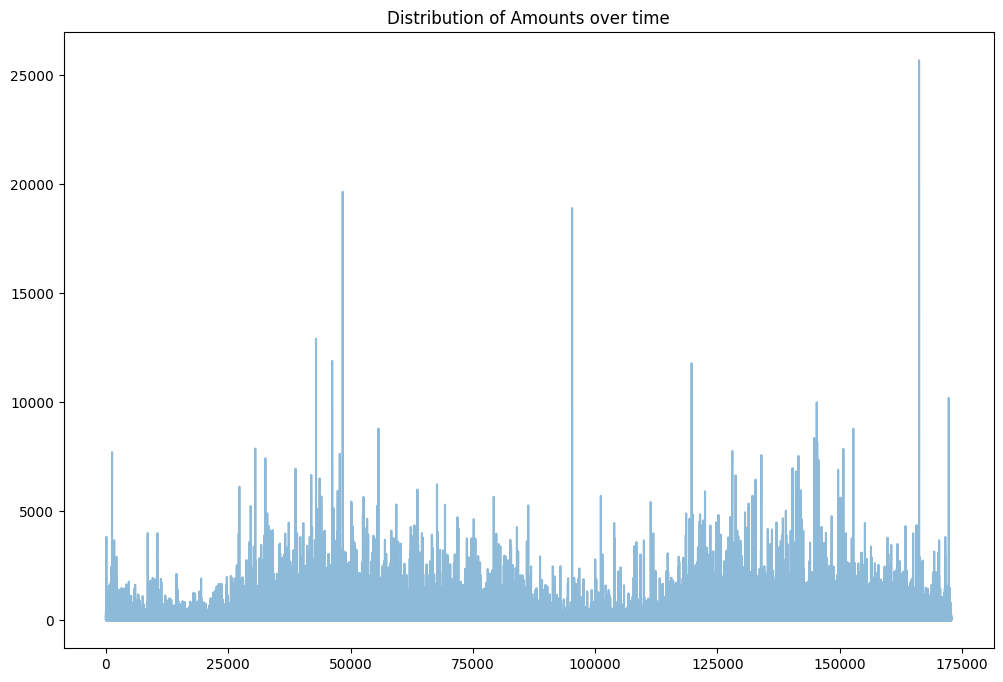

In [25]:
# Check the distribution of Amounts over time

fig = plt.figure(figsize=(12,8))
plt.plot(df['Time'],df['Amount'],alpha=0.5)
plt.title("Distribution of Amounts over time")
plt.show()

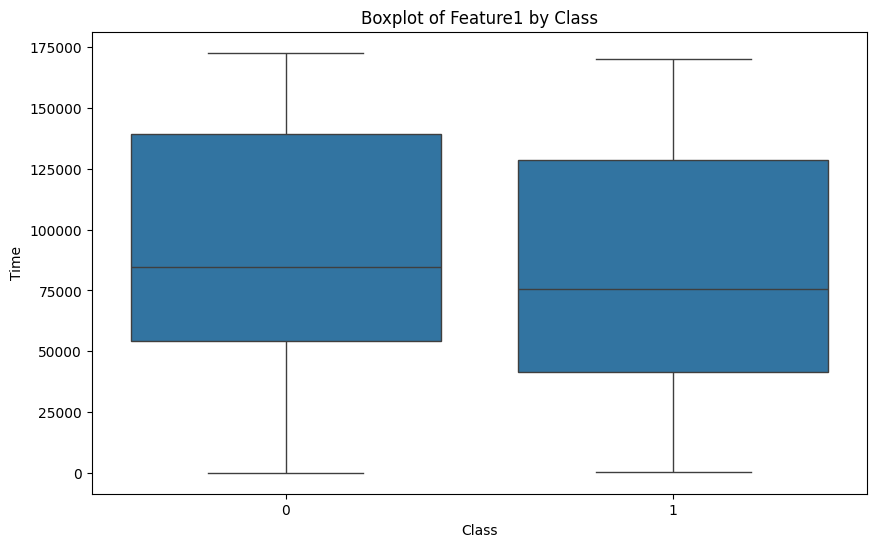

In [21]:
# Create a boxplot of Class over Time

plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Boxplot of Feature1 by Class')
plt.xlabel('Class')
plt.ylabel('Time')
plt.show()

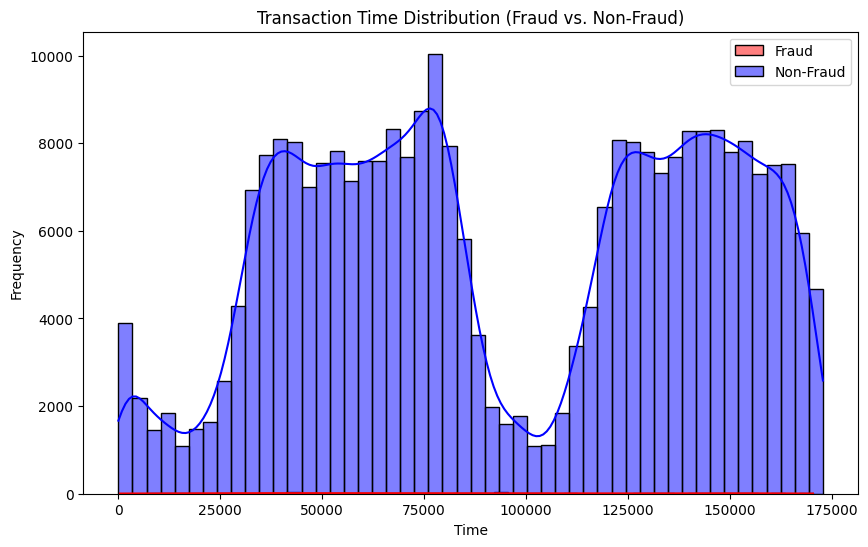

In [22]:
# Check the distribution of fraudulent transactions over time

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color="red", kde=True, label="Fraud")
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color="blue", kde=True, label="Non-Fraud", alpha=0.5)
plt.title("Transaction Time Distribution (Fraud vs. Non-Fraud)")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend()
plt.show()

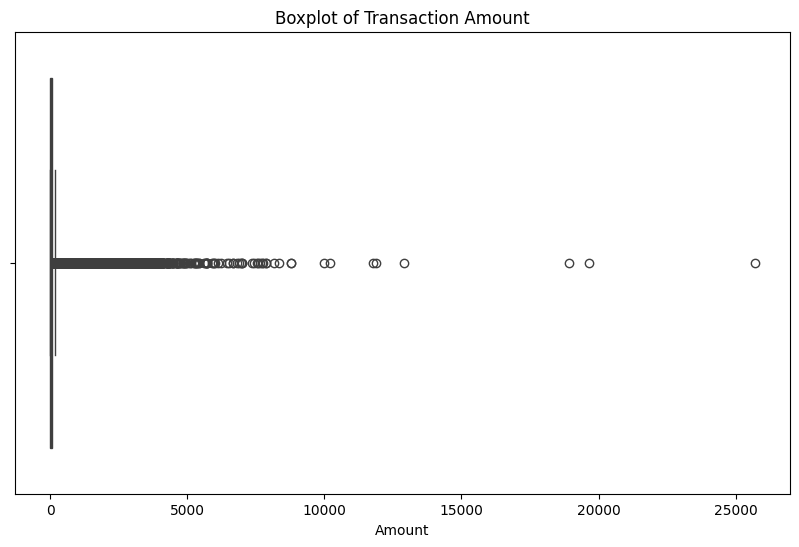

In [23]:
# Create a boxplot to identify outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Transaction Amount")
plt.show()


The above plot shows that there are certain outliers ie amounts above 18000 for example